In [1]:
!pip install -q diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.5 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import StableDiffusionPipeline
from IPython.display import display
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
def generate_image(prompt, num_images=1, height=512, width=512, num_inference_steps=50, guidance_scale=7.5):
    """
    Generate images from text prompts using Stable Diffusion

    Parameters:
    - prompt (str): Text description of the image to generate
    - num_images (int): Number of images to generate
    - height (int): Height of output image
    - width (int): Width of output image
    - num_inference_steps (int): Number of denoising steps (more = higher quality, slower generation)
    - guidance_scale (float): Higher values = stronger adherence to prompt (7-8.5 is a good range)

    Returns:
    - List of generated images
    """
    # Load pipeline
    pipe = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=torch.float16,
        safety_checker=None  # Set to None for faster inference, but be mindful of content
    )

    # Move pipeline to GPU if available
    device = "cuda" if torch.cuda.is_available() else "cpu"
    pipe = pipe.to(device)

    # Generate images
    images = []
    for i in range(num_images):
        image = pipe(
            prompt,
            height=height,
            width=width,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale
        ).images[0]

        images.append(image)

    return images

In [4]:
def display_images(images):
    """Display a list of images in the notebook"""
    for i, img in enumerate(images):
        display(img)

In [20]:
prompt = "dog using laptop"

In [21]:
images = generate_image(
    prompt=prompt,
    num_images=2,  # Generate 2 different variations
    num_inference_steps=30,  # Lower for faster generation (20-30 is good for testing)
    guidance_scale=7.5
)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

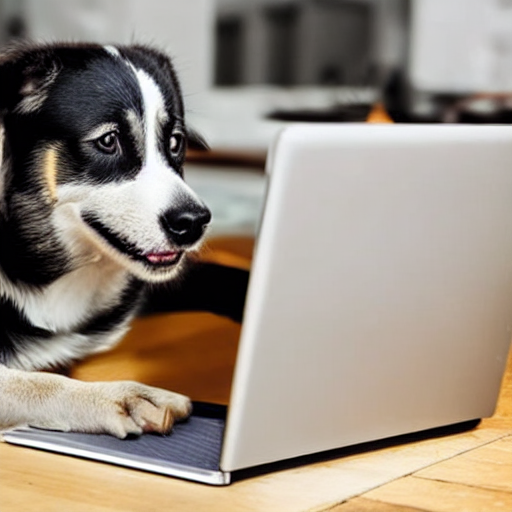

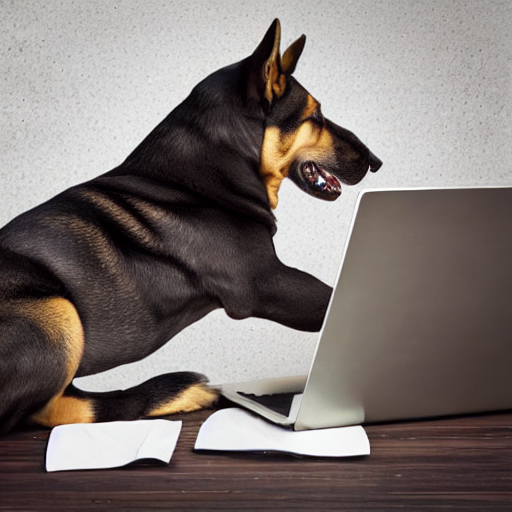

In [22]:
display_images(images)